In [240]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#Lets start by import some of our standard tools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

In [241]:
#Lets read the data
train = pd.read_csv("/Users/aparnaaidith/Desktop/Kaggle/all (1)/train_final.csv")
test = pd.read_csv("/Users/aparnaaidith/Desktop/Kaggle/all (1)/test_final.csv")

In [242]:
#The first thing you always do is LOOK at the data. Lets start with shapes
train.shape


(16383, 26)

In [243]:
test.shape

(16385, 25)

Ok, there are 16383 labeled examples in the training set and 16385 in the test set. Lets look more carefully.

In [244]:
test.head()  #You should always do that.


,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,...,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,...,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,...,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,...,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,...,4945,118360,118638,1,118636,1,1,1,1,1


In [245]:
train.head()


,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


In [246]:
testdum= pd.get_dummies(test)  #Ok lets try to run it, to see what it does. 

In [247]:
testdum.shape  #And then we look

(16385, 25)

In [248]:
list(testdum.columns.values)

['Id',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24']

In [249]:
list(train.columns.values)

['Id',
 'Y',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24']

## Checking that your target variable is binary
Since we are building a model to predict survival of passangers from the Titanic, our target is going to be "Survived" variable from the titanic dataframe. To make sure that it's a binary variable, let's use Seaborn's countplot() function.

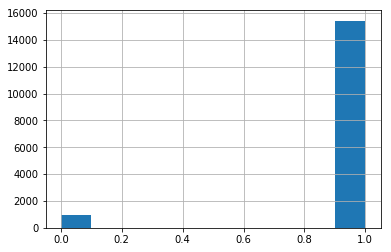

In [250]:
train.Y.hist()

## Checking for missing values
It's easy to check for missing values by calling the isnull() method, and the sum() method off of that, to return a tally of all the True values that are returned by the isnull() method.

In [251]:
train.isnull().sum()

Id     0
Y      0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [252]:
test.isnull().sum()

Id     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

# Data cleaning and feature normalization.
We are trying to predict the Y. Lets look at its statistics.

In [253]:
# Some data cleaning 

all_data = pd.concat((train.loc[:,'f1':'f24'],
                      test.loc[:,'f1':'f24']))


X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.Y


In [254]:
X_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,25884,1,33.63,118596,1,0,118595,125738,1,3,...,1945,118450,119184,1,121372,1,1,1,2,1
1,34346,1,10.62,118041,1,0,117902,130913,1,1,...,15385,117945,292795,1,259173,1,1,1,1,1
2,34923,1,1.77,118327,1,0,117961,124402,1,2,...,7547,118933,290919,1,118784,1,1,1,1,1
3,80926,1,30.09,118300,1,0,117961,301218,1,0,...,4933,118458,118331,1,307024,1,1,1,2,1
4,4674,1,1.77,119921,1,0,119920,302830,1,0,...,13836,142145,4673,1,128230,1,1,1,620,1


In [255]:
X_test.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,37733,1,1.77,118603,1,0,118602,118097,1,0,...,13881,117941,117887,1,117885,1,1,1,1,1
1,312129,1,3.54,118052,1,0,117961,290919,1,4,...,14638,118992,290919,1,118321,1,1,1,7,1
2,24884,1,23.01,118300,1,0,117961,302830,1,0,...,770,119181,4673,1,128230,1,1,1,14,1
3,4674,1,1.77,119091,1,0,119062,118036,1,9,...,16752,143531,290919,1,117905,1,1,1,81,1
4,68725,1,3.54,118300,1,0,117961,171056,1,0,...,4945,118360,118638,1,118636,1,1,1,1,1


In [256]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

# Training and Tuning models

Lets start with a simple Logistic regression.



In [257]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y)

/Users/aparnaaidith/py_37_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [258]:
y_pred_train = LogReg.predict(X_train)

In [259]:
y_pred_train

array([1, 1, 1, ..., 1, 1, 1])

In [260]:
# y_pred_test = LogReg.predict_proba(X_test)

# list(y_pred_test)

y_pred_test = LogReg.predict_proba(X_test)[:,1]
y_pred_test

array([0.93976072, 0.94012014, 0.9552582 , ..., 0.94094265, 0.93983381,
       0.93948877])

In [261]:
solution = pd.DataFrame({"Id":(test.Id) , "Y": y_pred_test})
solution.to_csv("/Users/aparnaaidith/Desktop/Kaggle/all (1)/solution.csv", index = False)